In [1]:
from src.datasets.shapenet_3dr2n2 import create_3dr2n2_dataloaders
from hydra import initialize, compose
from hydra.core.global_hydra import GlobalHydra
from omegaconf import DictConfig
from pathlib import Path
import os

# Set paths
CONFIG_PATH = "../configs"
CONFIG_NAME = "experiment_config"

# Clean up any existing Hydra instances
if GlobalHydra.instance().is_initialized():
    GlobalHydra.instance().clear()

# Set environment variable for config resolution
project_root = Path(os.getcwd()).parent
data_dir_abs = project_root / "data"
os.environ["DATA_DIR"] = str(data_dir_abs)

# Load Hydra config
initialize(version_base=None, config_path=CONFIG_PATH)
cfg = compose(config_name=CONFIG_NAME)


In [16]:
# Load dataset
train_loader, val_loader, test_loader = create_3dr2n2_dataloaders(cfg.datasets, subset_percentage=0.05)



100%|██████████| 30648/30648 [00:30<00:00, 998.29it/s] 


Using 5.00% of train data: 36777 samples.


100%|██████████| 6567/6567 [00:06<00:00, 1032.37it/s]


Using 5.00% of val data: 7880 samples.


100%|██████████| 6569/6569 [00:06<00:00, 1025.46it/s]

Using 5.00% of test data: 7882 samples.


(224, 224, 3)


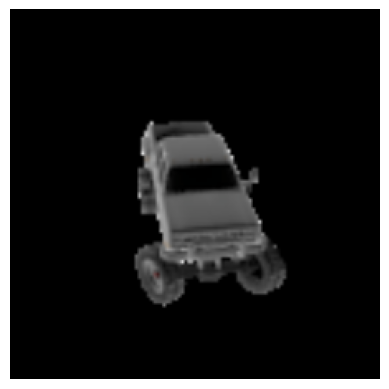

[0.01176469 0.01176473 0.0117647 ]


In [23]:
from PIL import Image
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt

sample = train_loader.dataset[230]

#print(sample)

img_tensor = sample["image"]

inv_normalize = T.Normalize(
    mean=[-m/s for m, s in zip([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])],
    std=[1/s for s in [0.229, 0.224, 0.225]]
)

img_tensor = inv_normalize(img_tensor)

img_np = img_tensor.clamp(0, 1).permute(1, 2, 0).numpy()


# Show the image
print(img_np.shape)
plt.imshow(img_np)
plt.axis('off')
plt.show()
print(img_np[100][100])

In [ ]:
import torchvision.transforms as T
import torchvision.transforms.functional as F

transform = T.Compose([
    T.RandomHorizontalFlip(),
    T.ColorJitter(brightness=2.0, contrast=2.0, saturation=2.0, hue=0.2),  # Intense jitter
    T.RandomApply([T.GaussianBlur(kernel_size=5, sigma=(1.0, 3.0))], p=0.5),  # Blurring effect
    T.RandomApply([T.RandomPosterize(bits=2)], p=0.3),  # Color quantization
    T.RandomApply([T.RandomAdjustSharpness(sharpness_factor=10)], p=0.7),  # Over-sharpening
    T.RandomApply([T.Lambda(lambda img: F.adjust_contrast(img, 3))], p=0.3),  # Boost contrast
    T.RandomApply([T.Lambda(lambda img: F.adjust_saturation(img, 3))], p=0.3),  # Boost saturation
    T.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.9, 1.1)),  # Random zoom
])

In [30]:
# Load dataset
train_loadert, val_loadert, test_loadert = create_3dr2n2_dataloaders(cfg.datasets, preprocess_transform=transform, subset_percentage=0.005)

100%|██████████| 30648/30648 [00:30<00:00, 1004.92it/s]


Using 0.50% of train data: 3677 samples.


100%|██████████| 6567/6567 [00:06<00:00, 1010.38it/s]


Using 0.50% of val data: 788 samples.


100%|██████████| 6569/6569 [00:06<00:00, 1007.01it/s]

Using 0.50% of test data: 788 samples.


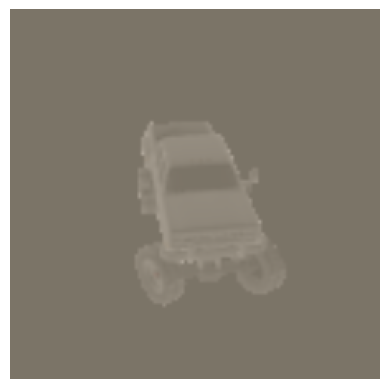

In [31]:
sample = train_loadert.dataset[230]

#print(sample)

imgt_tensor = sample["image"]

imgt_tensor = inv_normalize(img_tensor)

imgt_np = imgt_tensor.clamp(0, 1).permute(1, 2, 0).numpy()


# Show the image
plt.imshow(imgt_np)
plt.axis('off')
plt.show()